In [222]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [223]:
np.random.seed(0)

num_samples = 200
num_features = 3

# Generate random feature data
X = 10 * np.random.rand(num_samples, num_features) - 5

In [224]:
coefficients = np.array([[1.0], [1.0], [-1.0]])  # Shape (2, 1)
bias = -1
coefficients.shape

(3, 1)

In [225]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [226]:
# Calculate the log-odds (logit)
log_odds = bias + np.matmul(X, coefficients).flatten() + 0.5 * np.random.randn(num_samples)

probabilities = logistic_function(log_odds)

# Generate binary labels based on a threshold (e.g., 0.5)
labels = (probabilities > 0.5).astype(int)

labels = labels[:, np.newaxis]

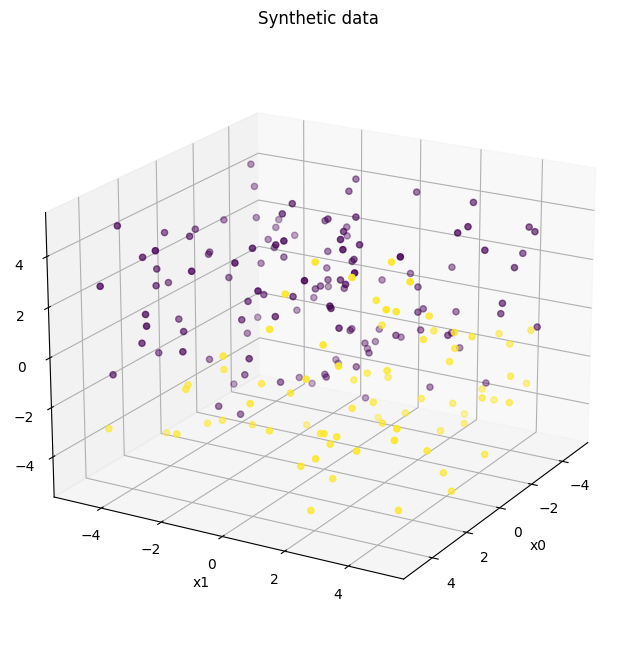

In [227]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatterplot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.squeeze(), marker='o')

# Set axis labels
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

# Set the view angle for better visibility of the Z-axis label
ax.view_init(elev=20, azim=30)

plt.title("Synthetic data")
plt.show()

In [228]:
def predict(X, W, b):
    prod = np.matmul(X, W)
    
    # print(f"{prod.shape=}")
    
    prod_with_bias = prod + b
    
    # print(f"{prod_with_bias.shape=}")
    
    return logistic_function(prod_with_bias)

In [229]:
def gradient(X, y, y_pred):
    # print(f"{y.shape=}")
    # print(f"{y_pred.shape=}")
    
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
    
    # print(f"{X_with_intercept.shape=}")
    
    error = y_pred - y
    
    # print(f"{error.shape=}")
    
    grad = np.matmul(error.T, X_with_intercept)
    
    # print(f"{grad.shape=}")
    
    return grad/len(X)

In [230]:
def objective(y, y_pred):
     # Ensure y_pred is within a small epsilon to avoid numerical issues
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))
    
    log_loss = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    
    # print(f"{log_loss.shape=}")
    
    ret = -np.mean(log_loss)

    # print(f"{ret.shape=}")

    return -np.mean(log_loss)

In [231]:
y_pred = predict(X, coefficients, bias)
objective(labels, y_pred)

gradient(X, labels, y_pred)

array([[ 0.02578101, -0.03372057, -0.02420241,  0.01806737]])

In [232]:
learning_rate = 0.05

n_iterations = 500

b_opt = 0
w_opt = np.array([[0.5], 
                  [0.5],
                  [0.5]])

losses = []
for i in range(n_iterations):
    preds = predict(X=X, W=w_opt, b=b_opt)
    
    # print(preds.shape)
    
    grad = gradient(y=labels, y_pred=preds, X=X).reshape(-1,1)
    
    w_opt -= learning_rate * grad[1:, :]
    b_opt -= learning_rate * grad[0, :]
    
    loss = objective(y=labels, y_pred=preds)
    
    print(loss)
    
    losses.append(loss)

print(f"Optimal weights: {w_opt}")
print(f"optimal bias: ", b_opt)
print(f"Minimum Loss Value: {losses[-1]}")

0.8604009274150968
0.8037446921868423
0.7516768385310587
0.7039084165890032
0.660165251123687
0.6201864762488019
0.5837223821733781
0.5505325436660166
0.52038463604638
0.49305394482975345
0.4683233961228788
0.4459839112832884
0.425834932557877
0.4076850165827209
0.39135242657320163
0.376665671754343
0.36346395203167003
0.3515974740643376
0.3409276150047119
0.33132692227473426
0.3226789503202231
0.3148779465127305
0.3078284069345768
0.30144452809835437
0.29564958278839976
0.2903752476838973
0.28556090795815636
0.2811529603970242
0.2771041323964994
0.2733728299882023
0.2699225241419668
0.2667211812039938
0.26374074053044505
0.26095664017428066
0.25834738983188776
0.2558941890833975
0.2535805881844401
0.25139218820630616
0.24931637710219587
0.2473420982358762
0.24545964799319356
0.2436604992647919
0.24193714780786912
0.24028297874181156
0.23869215068962865
0.2371594953320823
0.23568043038615535
0.23425088424894988
0.2328672307594386
0.23152623272248563
0.23022499301209912
0.22896091222461

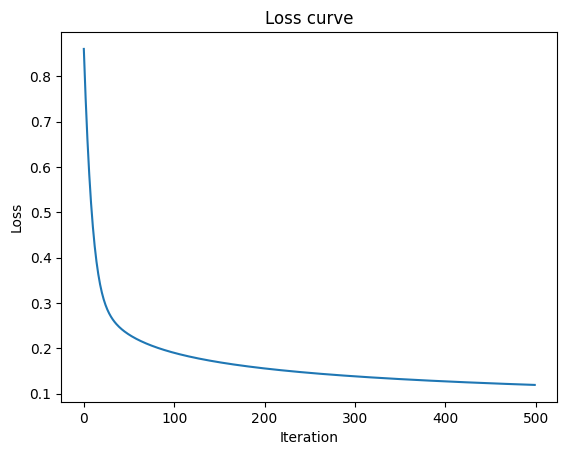

In [233]:
# plot loss curve
iterations = np.arange(n_iterations)
plt.plot(iterations, losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

In [234]:
predictions = predict(X=X, W=w_opt, b=b_opt)
rounded_predictions = (predictions > 0.5).astype(int)

# Compare the two arrays element-wise
correctly_classified = (labels == rounded_predictions)

# Count the number of True values (correct classifications)
num_correct = np.sum(correctly_classified)

# Calculate the accuracy as a percentage
accuracy = (num_correct / len(labels)) * 100

print("Number of correctly classified examples:", num_correct)
print("Accuracy:", accuracy, "%")

Number of correctly classified examples: 192
Accuracy: 96.0 %


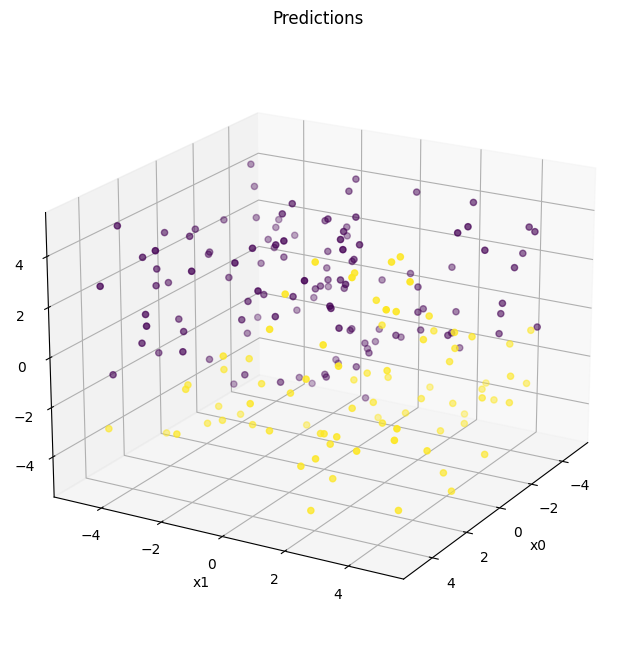

In [235]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatterplot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=rounded_predictions.squeeze(), marker='o')

# Set axis labels
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

# Set the view angle for better visibility of the Z-axis label
ax.view_init(elev=20, azim=30)

plt.title("Predictions")
plt.show()